#### General Preprations


In [156]:
# importing needed libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


##### Data Prepration

In [157]:
# importing data as a dataframe

insurance_DF = pd.read_csv('insurance.csv')
insurance_DF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [158]:
#checking NUll Values

insurance_DF.isnull().sum()
# there is no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [159]:
# get more info

insurance_DF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Data Visualization

In [160]:
# Set Plot Style

plt.style.use("seaborn-v0_8")


Text(0, 0.5, 'Count')

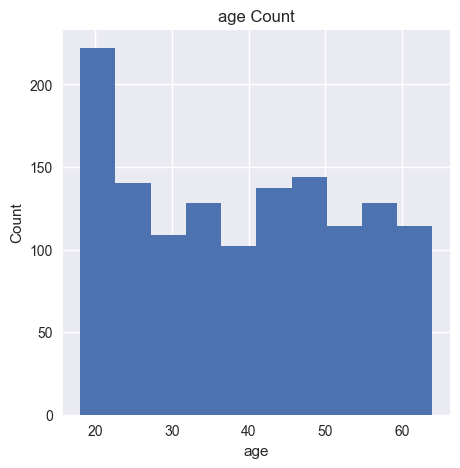

In [161]:
# age Dist

insurance_DF['age'].hist(figsize=(5,5))
plt.title("age Count")
plt.xlabel("age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

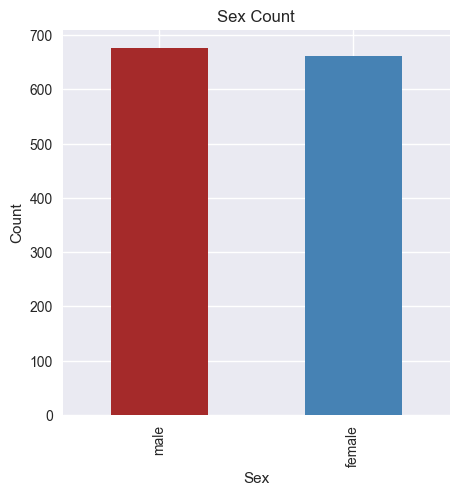

In [162]:
# Sex Dist

insurance_DF['sex'].value_counts().plot(kind='bar',color=['brown', 'steelblue'],figsize=(5,5))
plt.title("Sex Count")
plt.xlabel("Sex")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

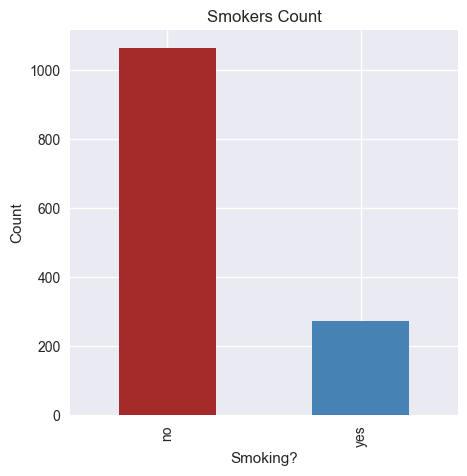

In [163]:
# Smoking Dist

insurance_DF['smoker'].value_counts().plot(kind='bar',color=['brown', 'steelblue'],figsize=(5,5))
plt.title("Smokers Count")
plt.xlabel("Smoking?")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

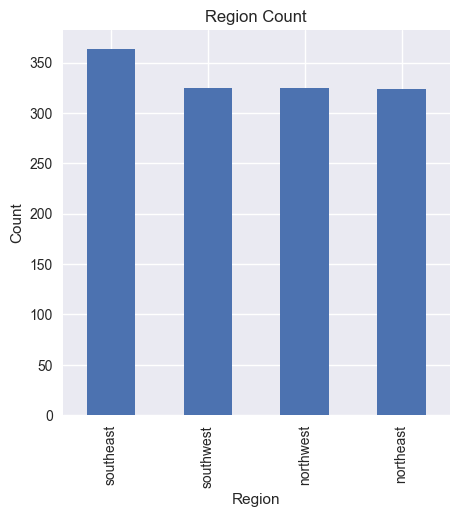

In [164]:
# Region Dist

insurance_DF['region'].value_counts().plot(kind='bar',figsize=(5,5))
plt.title("Region Count")
plt.xlabel("Region")
plt.ylabel("Count")

In [165]:
insurance_DF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Feature Selection

In [166]:
#convert strings to numric data

insurance_DF['sex'] = insurance_DF['sex'].apply({'male':0, 'female':1}.get)
insurance_DF['smoker'] = insurance_DF['smoker'].apply({'yes':1, 'no':0}.get)
insurance_DF['region'] = insurance_DF['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [167]:
insurance_DF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


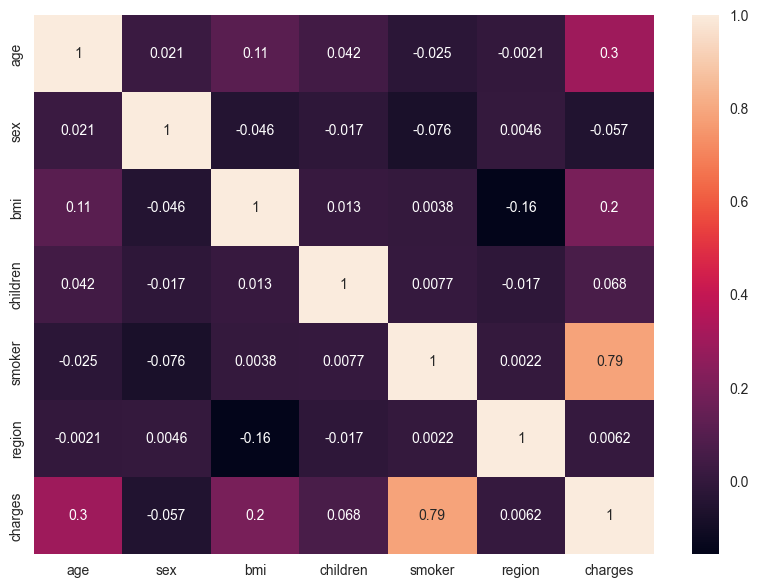

In [168]:
# find Correlation between each variable with cost

plt.figure(figsize=(10,7))
sns.heatmap(insurance_DF.corr(), annot = True)
plt.show()

In [169]:
# select relevant features ['age','bmi','smoker']

X = insurance_DF[['age','bmi','smoker']]
y = insurance_DF['charges']

#### Using Scikit-learn


In [170]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
# train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(model.coef_)
print(model.intercept_)


[  259.41020462   326.45023215 23675.37184666]
-11707.80233458317


In [172]:
# find R2 score

print("R2 score: ",(r2_score(y_test, prediction)))


R2 score:  0.7776932310583375


In [173]:
#add a new person (p) and add it to a DataFrame
p_age = 31
p_bmi = 25.74
p_is_smoking = 0

data = {'age':p_age,'bmi':p_bmi,'smoker':p_is_smoking}
p_cust_DF = pd.DataFrame(data, [0])

In [174]:
# use our model to predict the cost for person (p)

p_cost_pred = model.predict(p_cust_DF)
print("The cost = ", round(p_cost_pred[0],3))

The cost =  4736.743


#### implementation form scratch 

In [175]:
insurance_DF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


##### cost = w0 * age + w1 * bmi + w2 * smoker +b
<img src="./Gradient Descent Equations.png" style = 'width: 60%'/>

In [184]:
def gradient_descent(w0,w1,w2,b,data,L):
    optm_w0 = 0; optm_w1 = 0; optm_w2 = 0; optm_b = 0,
    n = len(insurance_DF)

    for i in range(n):
        x0 = data.iloc[i].age
        x1 = data.iloc[i].bmi
        x2 = data.iloc[i].smoker
        y = data.iloc[i].charges


        optm_w0 += -(2/n) * x0 * (y - (w0 * x0 + w1 * x1 + w2 * x2 + b))
        optm_w1 += -(2/n) * x1 * (y - (w0 * x0 + w1 * x1 + w2 * x2 + b))
        optm_w2 += -(2/n) * x2 * (y - (w0 * x0 + w1 * x1 + w2 * x2 + b))
        optm_b += -(2/n) * (y - (w0 * x0 + w1 * x1 + w2 * x2 + b))
    
    final_w0 = w0 - optm_w0 * L
    final_w1 = w1 - optm_w1 * L
    final_w2 = w0 - optm_w2 * L
    final_b = b - optm_b * L

    return final_w0, final_w1, final_w2, final_b

final_w0 = 0; final_w1 = 0; final_w2 = 0; final_b = 0
L = 0.0001
epochs = 1000

for i in range (epochs):
    final_w0,final_w1, final_w2, final_b = gradient_descent(final_w0,final_w1, final_w2, final_b, insurance_DF, L)

print(final_w0,final_w1, final_w2, final_b)

[208.98713831] [172.00784918] [209.74647255] [-35.75871887]


In [185]:
p_age = 31
p_bmi = 25.74
p_is_smoking = 0

y = final_w0 * p_age + final_w1 * p_bmi + final_w2 * p_is_smoking + final_b
print("The cost = ", y)

The cost =  [10870.32460678]
